### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

### Import datasets

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [3]:
train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [4]:
test.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0


In [5]:
train.shape,test.shape



((6019, 12), (1234, 11))

<b>Let's check for the missing values</b>

In [6]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [8]:
# Get names of columns with missing values
cols_with_missing = [col for col in train.columns
                     if train[col].isnull().any()]
print("Columns with missing values:")
print(cols_with_missing)

Columns with missing values:
['Mileage', 'Engine', 'Power', 'Seats']


<b> Data Preparation</b>

Let's first modify the 'Name' of the car and extract just the brand name.

In [9]:
train['Name'] = train.Name.str.split().str.get(0)
test['Name'] = test.Name.str.split().str.get(0)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [10]:
# Let's deal with them one by one.

train['Seats'].fillna(train['Seats'].mean(),inplace=True)
test['Seats'].fillna(test['Seats'].mean(),inplace=True)



NOTE: To get more accurate values, we need more data. So I'll combine df_train and df_test data. We will spilt it after filling null values

In [11]:
data= pd.concat([train,test], sort=False)

In [12]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                   0
Price                1234
dtype: int64

In [13]:
data['Year'] = data['Year'].astype('category')
data['Location'] = data['Location'].astype('category')
data['Fuel_Type'] = data['Fuel_Type'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
data['Owner_Type'] = data['Owner_Type'].astype('category')

In [14]:
data['Car_Age'] = data['Year'].apply(lambda x : 2019 - float(x)).astype(float)
data['Mileage'] = data['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

data['Engine'] = data['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

data['Power'] = data['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
data.drop('Year',axis=1,inplace=True)

In [15]:
data.head(2)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,9.0
1,Hyundai,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4.0


In [16]:
data['Engine'] = data.groupby(['Name']).transform(lambda x: x.fillna(x.median()))['Engine']
data['Power'] = data.groupby(['Name']).transform(lambda x: x.fillna(x.median()))['Power']
data['Mileage'] = data.groupby(['Name']).transform(lambda x: x.fillna(x.median()))['Mileage']

In [17]:
data.isnull().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
dtype: int64

In [18]:
data[data['Mileage']== 0.0].head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
14,Land,Pune,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.000000,17.50,7.0
67,Mercedes-Benz,Coimbatore,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.000000,35.67,0.0
79,Hyundai,Hyderabad,87591,Petrol,Manual,First,0.0,1086.0,0.0,5.000000,1.30,14.0
194,Honda,Ahmedabad,60006,Petrol,Manual,First,0.0,1497.0,98.6,5.278735,2.95,12.0
229,Ford,Bangalore,70436,Diesel,Manual,First,0.0,1498.0,99.0,5.278735,3.60,4.0


In [19]:
data['Mileage'] = data['Mileage'].apply(lambda x : 17.0 if x == 0.0 else x)

In [20]:
train_df = data[data['Price'].isnull()!=True]
test_df = data[data['Price'].isnull()==True]

In [21]:
train_df.shape


(6019, 12)

In [22]:
test_df.shape

(1234, 12)

In [23]:
train_df.isnull().sum()

Name                 0
Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
dtype: int64

In [24]:
test_df.isnull().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
dtype: int64

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Car_Age            6019 non-null   float64 
dtypes: category(4), float64(6), int64(1), object(1)
memory usage: 447.6+ KB


In [26]:
train_df['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [27]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Text(0, 0.5, 'Count of cars')

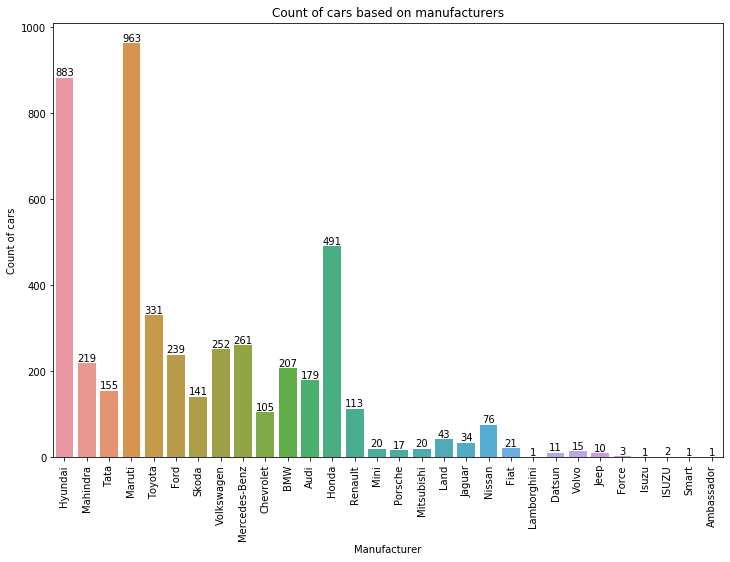

In [28]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Name', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4815, 11), (4815,), (1204, 11), (1204,))

In [30]:
X_train = pd.get_dummies(X_train,
                         columns = ["Name", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [31]:
X_test = pd.get_dummies(X_test,
                         columns = ["Name", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [32]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

In [33]:
X_train.shape,X_test.shape

((4815, 43), (1204, 38))

In [34]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [35]:
X_train.info()
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 3509 to 2732
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          4815 non-null   int64  
 1   Mileage                    4815 non-null   float64
 2   Engine                     4815 non-null   float64
 3   Power                      4815 non-null   float64
 4   Seats                      4815 non-null   float64
 5   Car_Age                    4815 non-null   float64
 6   Name_Audi                  4815 non-null   uint8  
 7   Name_BMW                   4815 non-null   uint8  
 8   Name_Chevrolet             4815 non-null   uint8  
 9   Name_Datsun                4815 non-null   uint8  
 10  Name_Fiat                  4815 non-null   uint8  
 11  Name_Force                 4815 non-null   uint8  
 12  Name_Ford                  4815 non-null   uint8  
 13  Name_Honda                 4815 non-null   ui

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)


In [37]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
print(linearRegression.score(X_train, y_train))
print(linearRegression.score(X_test, y_test))
y_pred = linearRegression.predict(X_test)
#r2_score(y_test, y_pred)

0.7631844071162945
0.7408573508409942


In [38]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#r2_score(y_test, y_pred)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9851833702764287
0.8858348010158771
